In [2]:
from PIL import Image
import numpy as np
import cv2

In [3]:
lena_image = Image.open("no_index/lena.png")

# Thumbnail
preserves aspect ratios

In [4]:
lena_image.thumbnail((128, 128))

# Cropping

Can be useful along with pasting

In [5]:
region = lena_image.crop((10, 10, 150, 150)).transpose(Image.ROTATE_180)

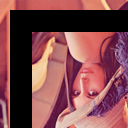

In [6]:
lena_image.paste(region, (10, 10, 150, 150))
lena_image

# Resizing

Compared to thumbnail do not preserve aspect ratios

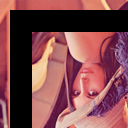

In [7]:
lena_image.resize((128, 128))

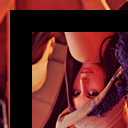

In [8]:
lena_array = np.array(lena_image)
lena_array = (255.0 * (lena_array / 255.0) ** 2).astype(np.uint8)
lena = Image.fromarray(lena_array)
lena

# Blurring

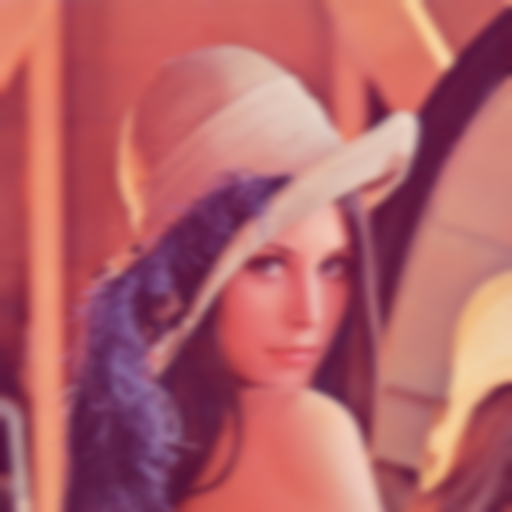

In [9]:
lena_image = np.array(Image.open("no_index/lena.png"))
lena_dst = lena_image.copy()
cv2.GaussianBlur(lena_image, (25, 25), 5, lena_dst, 3)

lena_dst = Image.fromarray(lena_dst.astype(np.uint8))
lena_dst

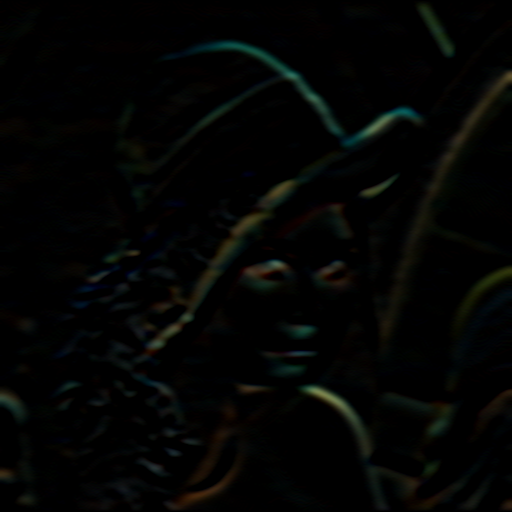

In [10]:
Image.fromarray(cv2.Sobel(np.array(lena_dst), 0, 0, 1, ksize=3))

# Sharpening
Can be done by subtracting blurred image

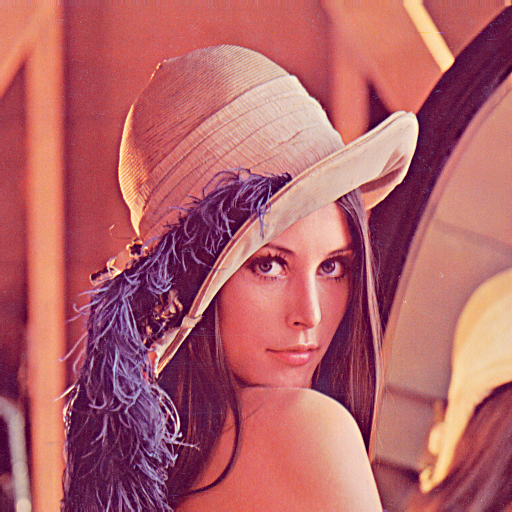

In [107]:
lena_image = np.array(Image.open("no_index/lena.png"))
lena_blurred = cv2.GaussianBlur(lena_image, (0, 0), 2, None, 2)
# lena_sharped = cv2.addWeighted(lena_image, 2.0, lena_blurred, -1, 0)
Image.fromarray(np.clip(lena_image * 1.5 - 0.5 * lena_blurred, 0, 255).astype(np.uint8))

# Quotient normalization

In [28]:
lena_image = np.array(Image.open("no_index/lena.png").convert("L"))
lena_blurred = cv2.GaussianBlur(lena_image, (0, 0), 3, None, 3)
quotient_normalized = (1.0 * lena_image / lena_blurred)
quotient_normalized = (quotient_normalized - quotient_normalized.min()) / (quotient_normalized.max() - quotient_normalized.min())
quotient_normalized = (quotient_normalized * 255.0).clip(0, 255).astype(np.uint8)

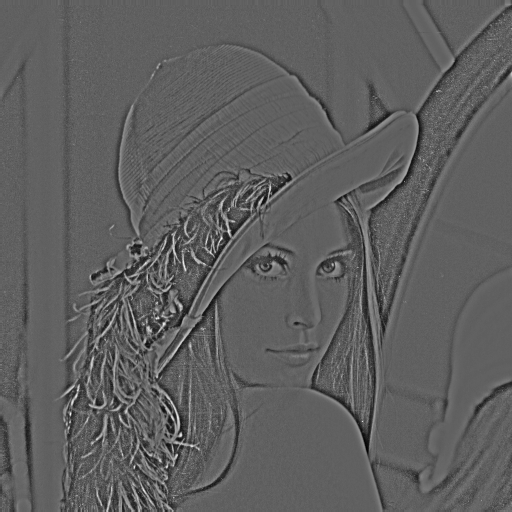

In [32]:
Image.fromarray(quotient_normalized)

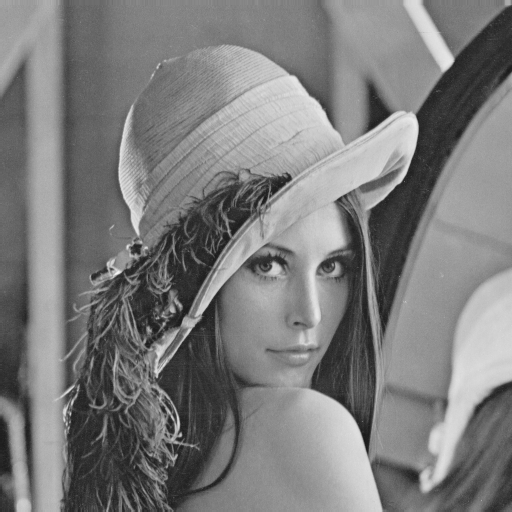

In [36]:
Image.fromarray(lena_image)

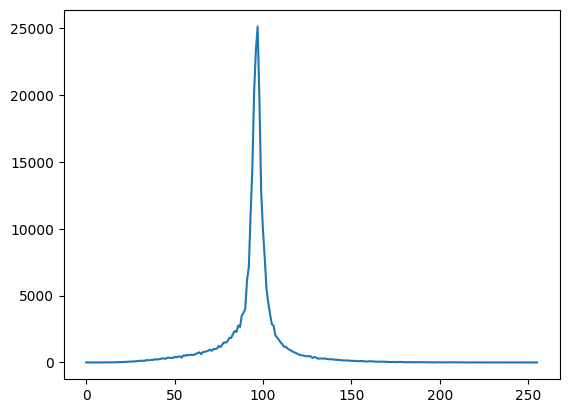

In [ ]:
import matplotlib.pyplot as plt
hist, bins = np.histogram(quotient_normalized, bins=256, range=[0, 255])
plt.plot(np.arange(256), hist)

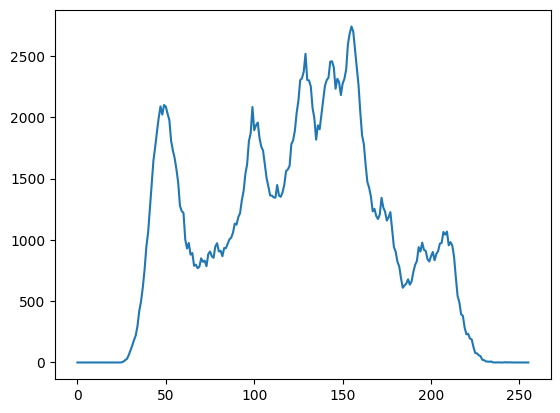

In [35]:
import matplotlib.pyplot as plt
hist, bins = np.histogram(lena_image, bins=256, range=[0, 255])
plt.plot(np.arange(256), hist)

# Outlines

In [ ]:
lena_image = np.array(Image.open("no_index/lena.png"))
lena_gradient = cv2.Sobel(lena_image, 0, 1, 1, ksize=3)
lena_gradient[lena_gradient < 35] = 0
lena_gradient[lena_gradient >= 35] = 255

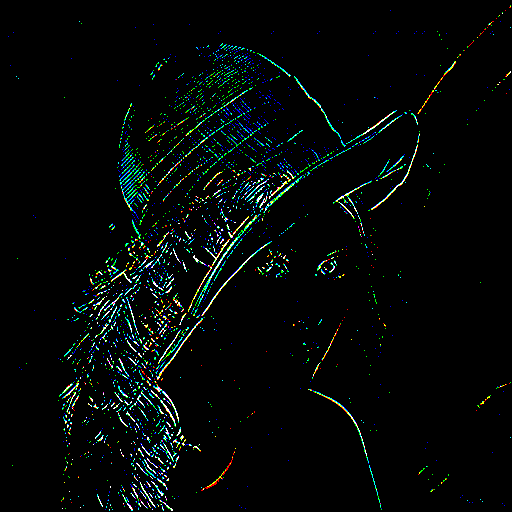

In [62]:
Image.fromarray(lena_gradient)